In [59]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [5]:
df_titanic =  pd.read_csv("C:/Users/drash/OneDrive/Desktop/PythonSQL/titanic.csv")

df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
df_titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
df_titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [9]:
df_titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

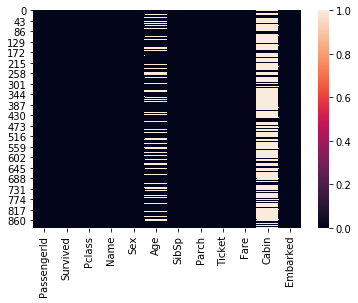

In [10]:
sns.heatmap(df_titanic.isnull())

Replacing NAN values

In [11]:
df_titanic["Age"] = df_titanic["Age"].replace(np.nan,df_titanic['Age'].mean())

df_titanic["Cabin"] = df_titanic["Cabin"].replace(np.nan,df_titanic["Cabin"].mode())

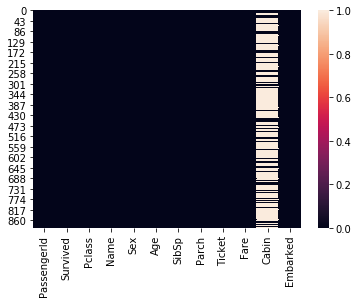

In [12]:
sns.heatmap(df_titanic.isnull())

In [13]:
df_titanic.shape

(891, 12)

In [14]:
df1 = df_titanic.drop( ["Name" , "Cabin" , "Ticket"] , axis = 1)

Using Label Encoder

In [15]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df1['Embarked'] = le.fit_transform(df1['Embarked'].astype(str))
df1['Sex'] = le.fit_transform(df1['Sex'].astype(str))

Check Outliers

In [16]:
collist = df1.columns.values

ncol = 12
nrows = 10

collist

array(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp',
       'Parch', 'Fare', 'Embarked'], dtype=object)

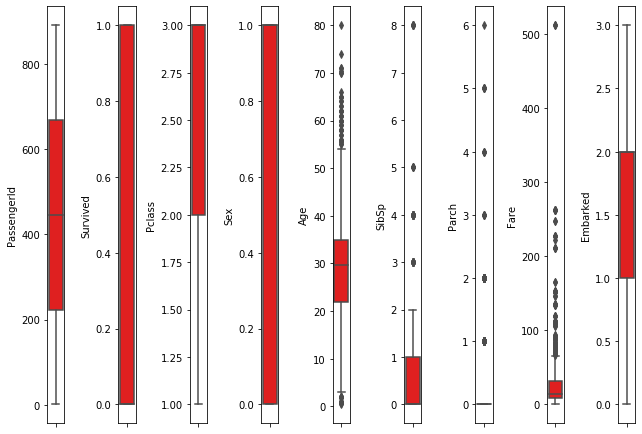

In [17]:
plt.figure(figsize = (ncol,5*ncol))
for i in range(0 , len(collist)):
    plt.subplot(nrows, ncol, i+1)
    sns.boxplot(df1[collist[i]] , color = 'red' , orient = 'v')
    plt.tight_layout()

Removing the outliers

In [18]:
from scipy.stats import zscore


z = np.abs(zscore(df1))
df_new = df1[(z<3).all(axis = 1)]

df_new

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.000000,1,0,7.2500,2
1,2,1,1,0,38.000000,1,0,71.2833,0
2,3,1,3,0,26.000000,0,0,7.9250,2
3,4,1,1,0,35.000000,1,0,53.1000,2
4,5,0,3,1,35.000000,0,0,8.0500,2
...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.000000,0,0,13.0000,2
887,888,1,1,0,19.000000,0,0,30.0000,2
888,889,0,3,0,29.699118,1,2,23.4500,2
889,890,1,1,1,26.000000,0,0,30.0000,0


In [19]:
df1.shape

(891, 9)

In [20]:
df_new.shape

(820, 9)

Relation between columns

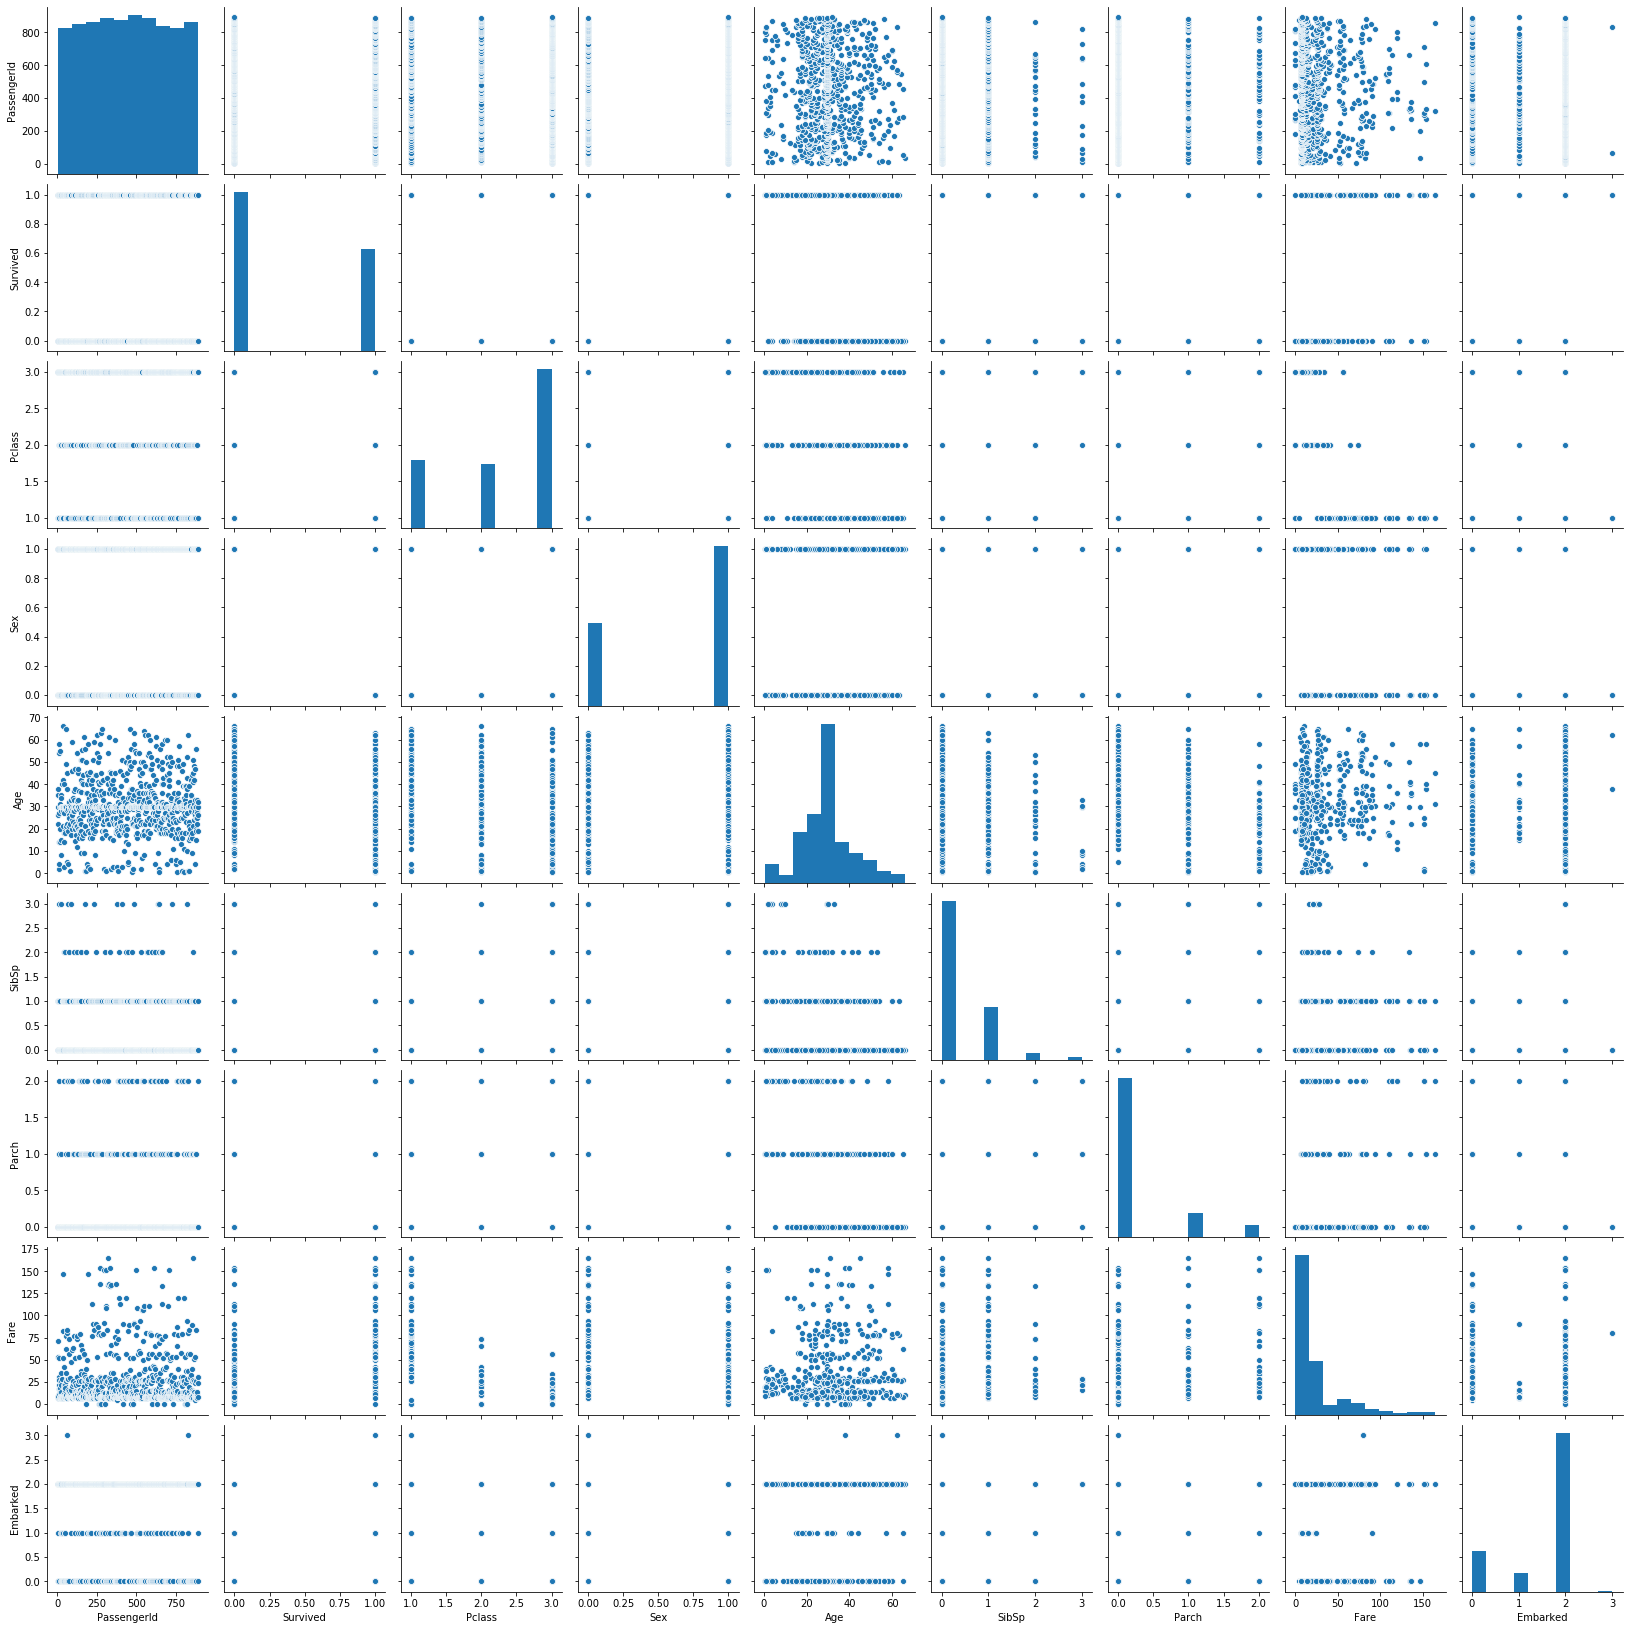

In [21]:
sns.pairplot(df_new)

In [22]:
x = df_new.iloc[:,[0,2,3,4,5,6,7,8]]

In [23]:
x

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,3,1,22.000000,1,0,7.2500,2
1,2,1,0,38.000000,1,0,71.2833,0
2,3,3,0,26.000000,0,0,7.9250,2
3,4,1,0,35.000000,1,0,53.1000,2
4,5,3,1,35.000000,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
886,887,2,1,27.000000,0,0,13.0000,2
887,888,1,0,19.000000,0,0,30.0000,2
888,889,3,0,29.699118,1,2,23.4500,2
889,890,1,1,26.000000,0,0,30.0000,0


In [24]:
x = x.astype(int)

In [25]:
y = df_new.iloc[:,1]

In [26]:
y.dtype

dtype('int64')

In [27]:
x.shape

(820, 8)

In [28]:
y.shape

(820,)

In [29]:
y = y.values.reshape(-1,1)

In [30]:
y.shape , y.dtype

((820, 1), dtype('int64'))

# Data Analysis - Logistic Regression

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [49]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 43 , test_size = 0.20)
lg = LogisticRegression()
lg.fit(x_train,y_train)
pred=lg.predict(x_test)
accuracyscore = accuracy_score(y_test,pred)
confmatrix = confusion_matrix(y_test,pred)
classreport = classification_report(y_test,pred)


print("Accuracy Score : " , accuracyscore)
print("\nConfusion Matrix : " , confmatrix)
print("\nClassification Report : " , classreport)

Accuracy Score :  0.8414634146341463

Confusion Matrix :  [[88 14]
 [12 50]]

Classification Report :                precision    recall  f1-score   support

           0       0.88      0.86      0.87       102
           1       0.78      0.81      0.79        62

    accuracy                           0.84       164
   macro avg       0.83      0.83      0.83       164
weighted avg       0.84      0.84      0.84       164



# Data Analysis - NaiveBayes - Gaussian NB

In [51]:
from sklearn.naive_bayes import GaussianNB

In [54]:
gnb = GaussianNB()
gnb.fit(x_train,y_train)
predgnb = gnb.predict(x_test)
accuracyscore = accuracy_score(y_test,predgnb)
confmatrix = confusion_matrix(y_test,predgnb)
classreport = classification_report(y_test,predgnb)


print("Accuracy Score : " , accuracyscore)
print("\nConfusion Matrix : " , confmatrix)
print("\nClassification Report : " , classreport)

Accuracy Score :  0.8170731707317073

Confusion Matrix :  [[83 19]
 [11 51]]

Classification Report :                precision    recall  f1-score   support

           0       0.88      0.81      0.85       102
           1       0.73      0.82      0.77        62

    accuracy                           0.82       164
   macro avg       0.81      0.82      0.81       164
weighted avg       0.82      0.82      0.82       164



# Predicting Data

In [56]:
lg.predict(x_test)

array([1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 1], dtype=int64)

# Saving the Model

In [61]:
from sklearn.externals import joblib

# Save the model as a object file

joblib.dump(lg , 'titanic_lg.obj')

#Load the model from the file

dtc_from_joblib = joblib.load('titanic_lg.obj')

# Use the loaded model to make predictions

dtc_from_joblib.predict(x_test)

array([1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 1], dtype=int64)